In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, UpSampling2D

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.astype('float32')/ 255.0
y_train = y_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
y_test = y_test.astype('float32')/25.0

In [ ]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
#making mnist noisy
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale = 1.0, size = x_test.shape)

In [ ]:
#matplotlib
%matplotlib inline


<function matplotlib.pyplot.show>

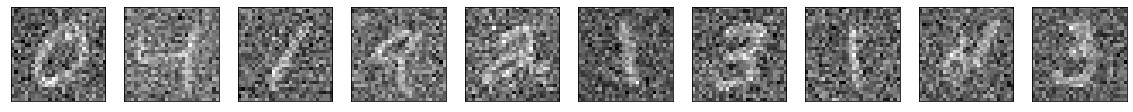

In [ ]:
#visualization
n = 10
plt.figure(figsize=(20,2))
for i in range(1, n+1):
  ax = plt.subplot(1, n, i)
  plt.imshow(x_train_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show

In [ ]:
def autoencoder_build(height, width, depth, filters):
  input_shape = (height, width, depth)
  inputs = Input(shape=input_shape)
  x = inputs
  F1, F2 = filters
  #encoding
  x = Conv2D(F1, (3,3), strides= (1,1), activation='relu', padding='same')(x)
  x = MaxPooling2D((2,2), padding = 'same')(x)
  x = Conv2D(F2, (3,3), activation='relu', strides=(1,1), padding='same')(x)
  x = MaxPooling2D((2,2), padding = 'same')(x)
  #dimesion = 7 , 7, 32
  #decoding
  x = Conv2D(F2, (3,3), strides=(1,1), activation='relu', padding='same')(x)
  x= UpSampling2D((2,2))(x)
  x = Conv2D(F2, (3,3), strides=(1,1), activation='relu', padding='same')(x)
  x = UpSampling2D((2,2))(x)
  decoded = Conv2D(1, (3,3), activation='sigmoid', strides=(1,1), padding='same')(x)

  autoencoder = Model(inputs, decoded, name = 'pyramid')
  return autoencoder


In [ ]:
autoencoder = autoencoder_build(28, 28, 1, (64, 32))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
print(autoencoder.summary())

Model: "pyramid"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0   

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs = 50,
                batch_size = 128,
                shuffle = True,
                validation_data = (x_test_noisy, x_test))

In [ ]:
autoencoder.evaluate(x_train_noisy, x_train)

1875/1875 [==============================] - 49s 26ms/step - loss: 0.0920


0.09195040166378021

In [ ]:
decoded_val = autoencoder.predict(x_test)

<function matplotlib.pyplot.show>

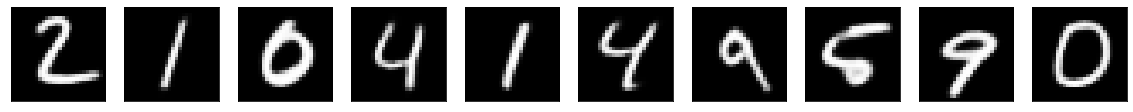

In [ ]:
#visualization
n = 10
plt.figure(figsize=(20,2))
for i in range(1, n+1):
  ax = plt.subplot(1, n, i)
  plt.imshow(decoded_val[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show